## Importing Data and making Dataframe

In [146]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import linear_model

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train2 = train.copy()

train2 = train2.drop('Id',axis=1)

In [147]:
print(train2.keys())

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Identifying NAs

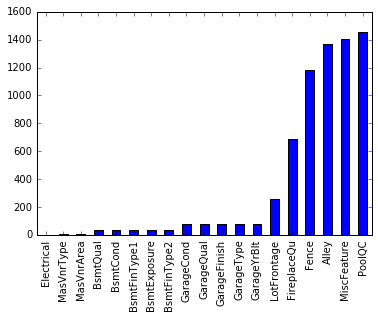

In [113]:
%matplotlib inline

missing = train2.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
train2.dtypes

In [ ]:
#quant = [f for f in train2.columns if train2.dtypes[f] != 'object']
#qual = [f for f in train2.columns if train2.dtypes[f] == 'object']

#quant
#qual

79442.50288288663

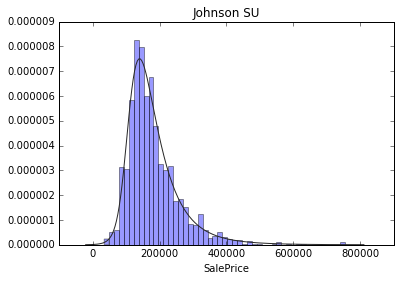

In [13]:
import scipy.stats as st
import seaborn as sns

y = train2.SalePrice

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

y.std()

In [114]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(train2[['SalePrice']], train2['LotArea'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

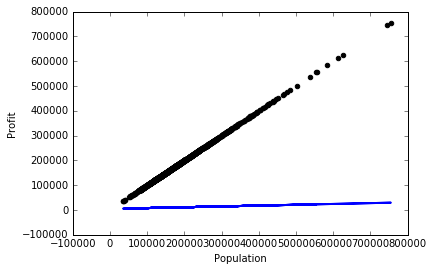

In [15]:
plt.plot(train2[['SalePrice']], ols.predict(train2[['SalePrice']]), lw=2)
## plot the data points
plt.scatter(train2[['SalePrice']].iloc[:,0], y, c='k')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [17]:
train2.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

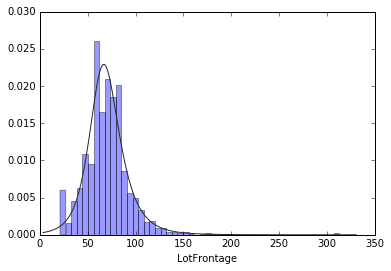

In [18]:
histlot = train2[train2['LotFrontage'].notnull()]
sns.distplot(histlot.LotFrontage, kde=False, fit=st.johnsonsu)

In [19]:
train2[train2['LotFrontage'].notnull()].LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Cleaning and munging Data

In [148]:
train2['PoolQC'].fillna('No Pool',inplace = True)
train2['MiscFeature'].fillna('None',inplace = True)
train2['Alley'].fillna('No Alley Access',inplace = True)
train2['Fence'].fillna('No Fence',inplace = True)
train2['FireplaceQu'].fillna('No Fireplace',inplace = True)
train2['LotFrontage'] = train2['LotFrontage'].fillna(train2.groupby(['Neighborhood'])['LotFrontage'].transform('mean').round())
train2['GarageYrBlt'].fillna('No Garage',inplace = True)
train2['GarageType'].fillna('No Garage',inplace = True)
train2['GarageFinish'].fillna('No Garage',inplace = True)
train2['GarageQual'].fillna('No Garage',inplace = True)
train2['GarageCond'].fillna('No Garage',inplace = True)
train2['BsmtFinType2'].fillna('No Garage',inplace = True)
train2['BsmtExposure'].fillna('No Garage',inplace = True)
train2['BsmtFinType1'].fillna('No Garage',inplace = True)
train2['BsmtCond'].fillna('No Garage',inplace = True)
train2['BsmtQual'].fillna('No Garage',inplace = True)
train2['MasVnrArea'].fillna(0,inplace = True)
train2['MasVnrType'].fillna('None',inplace = True)
train2['Electrical'].fillna('SBrkr', inplace = True)

In [149]:
quant_feats = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
              'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','SalePrice']

qual_feats = [item for item in train2.columns if item not in quant_feats]

In [150]:
train2[qual_feats] = train2[qual_feats].astype(object)

In [153]:
qual_feats

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

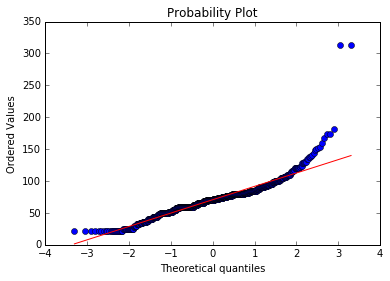

In [137]:
import numpy as np 
import pylab 
import scipy.stats as stats
  
stats.probplot(train2.LotFrontage, dist="norm", plot=pylab)
pylab.show()

In [154]:
df = train2.copy()

In [ ]:
df.drop('SalePrice', axis=1)

In [156]:
qual_dummies = pd.get_dummies(df[qual_feats], drop_first = True)

In [158]:
#qual_dummies.shape
dummy_train = pd.concat([train2[quant_feats],qual_dummies],axis = 1)

In [160]:
#dummy_train.iloc[[1298]]
dummy_train.drop(dummy_train.index[1298], inplace = True)
dummy_train.drop(dummy_train.index[523], inplace = True)
dummy_train.drop(dummy_train.index[1182], inplace = True)

In [172]:
dummy_train.shape

(1457, 566)

## Regression

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [175]:
y = dummy_train.SalePrice
X = dummy_train.loc[:, dummy_train.columns != 'SalePrice']

In [230]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.25,random_state=0)

In [231]:
kag_reg = LinearRegression()

In [232]:
kag_reg.fit(train_X,train_y, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [233]:
kag_reg.predict(val_X)

array([ 157661.21238663,  170908.19040184,  115231.11404957,
        124329.80761946,  334006.33943171,  141660.15383614,
        178931.24856731,  119008.08337953,  152983.6064999 ,
        261986.43709019,  223863.16305691,  213223.71606077,
        176858.53815046,  122857.24251669,   76530.79653481,
        165398.90313803,  202787.34742913,   98088.75988177,
        164320.32095989,  472681.86596909,  293348.38282836,
        163846.95852562,  300159.34691057,   66230.54453873,
        127390.04591404,  133242.26542975,  116483.55297683,
         80635.83937412,  201832.59031384,  291530.28350161,
        153993.86709797,  231043.30009107,  174412.69659519,
        209299.62400083,  434290.65771725,  163944.57698234,
         93642.1453774 ,  188797.7625583 ,  134226.34417852,
        115873.59572671,  130866.078331  ,  187459.21580988,
        300594.26609101,   92916.45697112,  235818.76595494,
        120798.47436725,  270858.87317121,  123152.61842956,
        120783.1176123 ,

In [234]:
kag_reg.score(val_X,val_y)

0.83041959825982159

## Ridge and Lasso

In [235]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [236]:
ridge_reg = RidgeCV(cv=10)

ridge_reg.fit(train_X, train_y)

ridge_reg.predict(val_X)

ridge_reg.score(val_X, val_y)

0.91248255401950462

In [237]:
ridge_reg

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [238]:
lasso_reg = LassoCV(cv=10)

lasso_reg.fit(train_X, train_y)

lasso_reg.predict(val_X)

lasso_reg.score(val_X, val_y)

0.77117560474291325